In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('./diet.csv')

In [3]:
dataset

,Month,diet
0,2013-01,100
1,2013-02,93
2,2013-03,92
3,2013-04,95
4,2013-05,90
...,...,...
116,2022-09,46
117,2022-10,45
118,2022-11,42
119,2022-12,39


In [4]:
Y_t = np.array(dataset["diet"])

In [28]:
Y_t.shape

(121,)

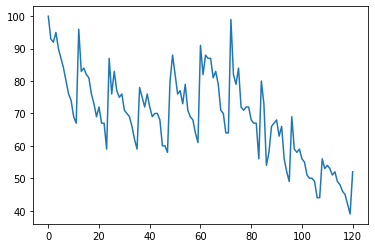

In [6]:
plt.plot(Y_t)

In [22]:
p = 12

In [23]:
s = p//2
print('p =', p)
print('s =', s)

p = 12
s = 6


In [24]:
filt = 1/p * np.ones((2*s + 1))
if p%2==0:
    filt[0] /= 2
    filt[-1] /= 2

In [25]:
filt.shape

(13,)

In [26]:
Y_star_t = np.convolve(Y_t,filt,'valid')

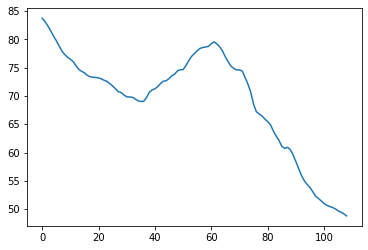

In [27]:
plt.plot(Y_star_t)

In [29]:
Y_star_t.shape

(109,)

In [30]:
D_t = Y_t[s:-s] - Y_star_t

In [31]:
D_t.shape

(109,)

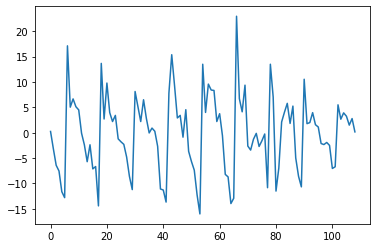

In [32]:
plt.plot(D_t)

In [38]:
D_bar_t = []
for j in range(p): # j=0,1,...,p-1
    if j>=s:
        #print(j-s)
        D_bar_t.append(D_t[(j-s)::p].mean())
    else:
        #print(j+p-s)
        D_bar_t.append(D_t[(j+p-s)::p].mean())
D_bar_t = np.array(D_bar_t)

In [41]:
D_bar_t.shape

(12,)

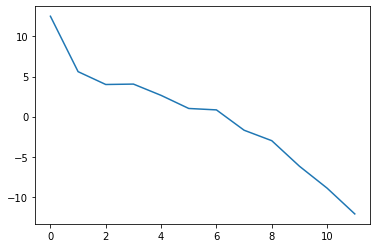

In [42]:
plt.plot(D_bar_t)

In [43]:
E_D_bar = D_bar_t.mean()

In [44]:
E_D_bar

-0.10154320987653802

In [45]:
S_hat = D_bar_t - E_D_bar

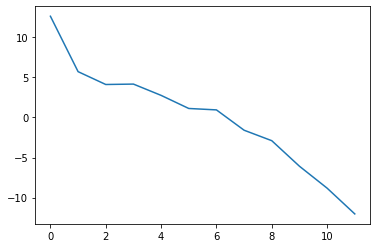

In [46]:
plt.plot(S_hat)

In [47]:
S_hat_t = np.zeros((121,))

In [48]:
for i in range(121):
    S_hat_t[i] = S_hat[i%p]

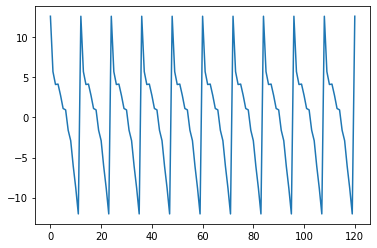

In [49]:
plt.plot(S_hat_t)

In [50]:
Y_minus_S_hat_t = Y_t - S_hat_t

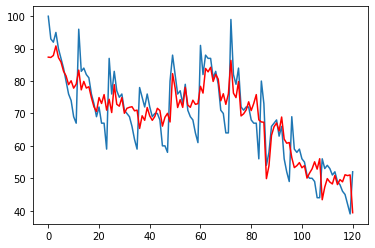

In [51]:
plt.plot(Y_t)
plt.plot(Y_minus_S_hat_t,'r')